# Basic Queueing System

In [1]:
%matplotlib inline
import ciw
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
N = ciw.create_network(
    Arrival_distributions={'Class 0': [['Exponential', 5.0], ['Exponential', 3.4]],
                           'Class 1': [['Exponential', 4.1], ['Exponential', 1.2]]},
    Service_distributions={'Class 0': [['Exponential', 7.0], ['Exponential', 6.2]],
                           'Class 1': [['Exponential', 2.1], ['Exponential', 4.5]]},
    Transition_matrices={'Class 0': [[0.0, 0.5],
                                     [0.5, 0.0]],
                         'Class 1': [[0.2, 0.2],
                                     [0.2, 0.2]]},
    Number_of_servers=[5, 2]
)

In [3]:
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)

In [4]:
recs = Q.get_all_records()

0.430447507617


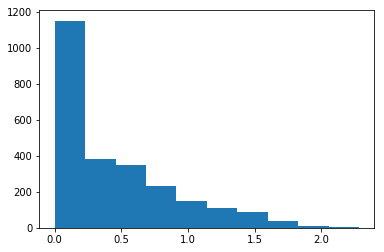

In [5]:
waits = [r.waiting_time for r in recs]
print(np.mean(waits))
plt.hist(waits);

0.63295653242


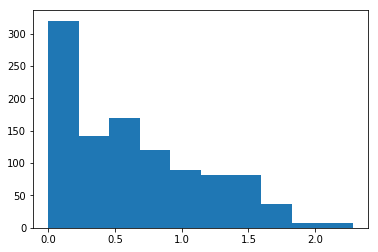

In [6]:
waits = [r.waiting_time for r in recs if r.node==2]
print(np.mean(waits))
plt.hist(waits);

#  
#  
#  
#  
#  
#  
# Service Distributions

In [7]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 15.0]],
    Service_distributions=[['Exponential', 10.0]],
    Number_of_servers=[1]
)

In [8]:
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

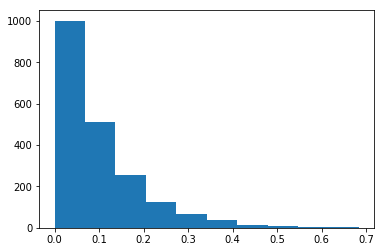

In [9]:
plt.hist(service_times);

In [11]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 15.0]],
    Service_distributions=[['Lognormal', -2.65, 0.83]],
    Number_of_servers=[1]
)

In [12]:
ciw.seed(2)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

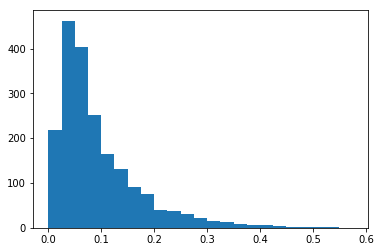

In [13]:
plt.hist(service_times, bins=[i/40 for i in range(24)]);

In [14]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 15.0]],
    Service_distributions=[['Uniform', 0.0, 0.2]],
    Number_of_servers=[1]
)

In [15]:
ciw.seed(2)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

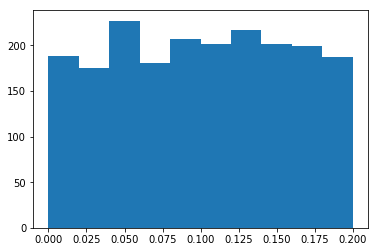

In [16]:
plt.hist(service_times);

In [17]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 15.0]],
    Service_distributions=[['Custom', [0.04, 0.09, 0.12, 0.45], [0.4, 0.3, 0.2, 0.1]]],
    Number_of_servers=[1]
)

In [18]:
ciw.seed(2)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

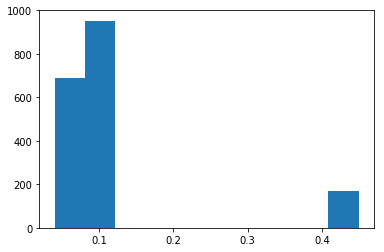

In [19]:
plt.hist(service_times);

In [20]:
Counter(service_times)

Counter({0.03999999999999204: 232,
         0.03999999999999915: 216,
         0.040000000000000036: 27,
         0.04000000000000625: 213,
         0.08999999999999986: 73,
         0.08999999999999997: 1,
         0.09000000000000008: 2,
         0.09000000000000341: 495,
         0.11999999999999744: 66,
         0.11999999999999922: 10,
         0.11999999999999988: 1,
         0.12: 1,
         0.1200000000000001: 12,
         0.120000000000001: 30,
         0.12000000000000455: 261,
         0.44999999999998863: 66,
         0.4499999999999993: 21,
         0.44999999999999996: 2,
         0.45000000000000007: 1,
         0.4500000000000002: 6,
         0.45000000000000107: 1,
         0.45000000000000284: 70})

#  
#  
#  
#  
#  
#  
# Priority Queues

In [21]:
N = ciw.create_network(
    Arrival_distributions={'Class 0': [['Exponential', 5.0]],
                           'Class 1': [['Exponential', 4.1]]},
    Service_distributions={'Class 0': [['Exponential', 7.0]],
                           'Class 1': [['Exponential', 2.1]]},
    Transition_matrices={'Class 0': [[0.0]],
                         'Class 1': [[0.0]]},
    Number_of_servers=[3]
)

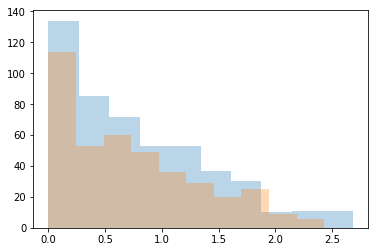

In [22]:
ciw.seed(42)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)
recs = Q.get_all_records()
waits0 = [r.waiting_time for r in recs if r.customer_class==0]
waits1 = [r.waiting_time for r in recs if r.customer_class==1]
plt.hist(waits0, alpha=0.3)
plt.hist(waits1, alpha=0.3)
plt.show()

In [23]:
N = ciw.create_network(
    Arrival_distributions={'Class 0': [['Exponential', 5.0]],
                           'Class 1': [['Exponential', 4.1]]},
    Service_distributions={'Class 0': [['Exponential', 7.0]],
                           'Class 1': [['Exponential', 2.1]]},
    Transition_matrices={'Class 0': [[0.0]],
                         'Class 1': [[0.0]]},
    Number_of_servers=[3],
    Priority_classes={'Class 0': 0,
                      'Class 1': 1}
)

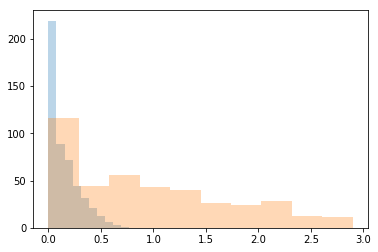

In [24]:
ciw.seed(42)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)
recs = Q.get_all_records()
waits0 = [r.waiting_time for r in recs if r.customer_class==0]
waits1 = [r.waiting_time for r in recs if r.customer_class==1]
plt.hist(waits0, alpha=0.3)
plt.hist(waits1, alpha=0.3)
plt.show()

#  
#  
#  
#  
#  
#  
# Baulking

In [25]:
def my_baulking_function(x):
    if x <= 2:
        return x / 20.0
    if x <= 10:
        return x / (x + 3)
    return 1.0

In [26]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 10.0]],
    Service_distributions=[['Exponential', 12.0]],
    Number_of_servers=[1]
)



N_baulk = ciw.create_network(
    Arrival_distributions=[['Exponential', 10.0]],
    Service_distributions=[['Exponential', 12.0]],
    Number_of_servers=[1],
    Baulking_functions=[my_baulking_function]
)

In [27]:
average_waits = []
for i in range(25):
    ciw.seed(i)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(100)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs]
    average_waits.append(sum(waits)/len(waits))
print(sum(average_waits)/len(average_waits))

0.4338055231813675


In [28]:
average_waits = []
for i in range(25):
    ciw.seed(i)
    Q = ciw.Simulation(N_baulk)
    Q.simulate_until_max_time(100)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs]
    average_waits.append(sum(waits)/len(waits))
print(sum(average_waits)/len(average_waits))

0.10021909113183498


#  
#  
#  
#  
#  
#  
# Server Schedules

In [29]:
my_schedule = [[1, 10], [0, 20]]

In [30]:
N = ciw.create_network(
   Arrival_distributions=[['Exponential', 2.0]],
   Service_distributions=[['Exponential', 10.0]],
   Number_of_servers=[my_schedule]
)

In [31]:
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
waits = [r.waiting_time for r in recs]

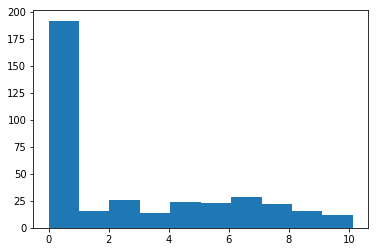

In [32]:
plt.hist(waits);

#  
#  
#  
#  
#  
#  
# Deadlock Detection

In [33]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 4.0]],
    Service_distributions=[['Exponential', 5.0]],
    Transition_matrices=[[0.5]],
    Queue_capacities=[4],
    Number_of_servers=[1]
)

In [34]:
ciw.seed(1)

Q = ciw.Simulation(N, deadlock_detector='StateDigraph')

Q.simulate_until_deadlock()

In [35]:
Q.times_to_deadlock[((0, 0),)]

2.0175416547486478